In [16]:
%matplotlib inline

import os
import numpy as np
from deepsign.rp.index import TrieSignIndex as Index
from deepsign.io.datasets.toefl import TOEFLReader
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.decomposition import PCA
from deepsign.utils.measure import cosine


# model dir
home = os.getenv("HOME")
data_dir = home + "/data/datasets/"
result_dir = home + "/data/results/"
model_dir = result_dir + "nrp/300d_reg_all/"
model_file = model_dir + "model_bnc"
embeddings_file = model_dir + "embeddings.npy"
index_file = model_dir + "index.hdf5"

In [18]:
# load index
index = Index.load(index_file)

  0%|          | 0/468560 [00:00<?, ?it/s]

  1%|▏         | 6811/468560 [00:00<00:06, 68105.03it/s]

  4%|▎         | 17521/468560 [00:00<00:05, 76455.21it/s]

  6%|▌         | 25979/468560 [00:00<00:05, 78722.49it/s]

  7%|▋         | 33782/468560 [00:00<00:05, 78513.25it/s]

 10%|▉         | 44700/468560 [00:00<00:04, 85737.23it/s]

 12%|█▏        | 54918/468560 [00:00<00:04, 90085.28it/s]

 14%|█▍        | 64796/468560 [00:00<00:04, 92526.48it/s]

 16%|█▌        | 74245/468560 [00:00<00:04, 93105.43it/s]

 18%|█▊        | 84186/468560 [00:00<00:04, 94910.39it/s]

 20%|█▉        | 93517/468560 [00:01<00:05, 65257.64it/s]

 22%|██▏       | 103348/468560 [00:01<00:05, 72577.41it/s]

 24%|██▍       | 113436/468560 [00:01<00:04, 79246.57it/s]

 26%|██▋       | 123101/468560 [00:01<00:04, 83771.01it/s]

 28%|██▊       | 133129/468560 [00:01<00:03, 88123.10it/s]

 31%|███       | 143216/468560 [00:01<00:03, 91594.76it/s]

 33%|███▎      | 152803/468560 [00:01<00:03, 88277.86it/s]

 35%|███▍      | 163029/468560 [00:01<00:03, 92052.69it/s]

 37%|███▋      | 174060/468560 [00:01<00:03, 96862.06it/s]

 39%|███▉      | 184002/468560 [00:02<00:03, 90677.91it/s]

 42%|████▏     | 194485/468560 [00:02<00:02, 94503.52it/s]

 44%|████▎     | 204159/468560 [00:02<00:02, 94546.29it/s]

 46%|████▌     | 213770/468560 [00:02<00:02, 92463.71it/s]

 48%|████▊     | 223240/468560 [00:02<00:02, 93122.21it/s]

 50%|████▉     | 233317/468560 [00:02<00:02, 95289.65it/s]

 52%|█████▏    | 242918/468560 [00:02<00:02, 90148.04it/s]

 54%|█████▍    | 252041/468560 [00:02<00:02, 85137.24it/s]

 56%|█████▌    | 260688/468560 [00:02<00:02, 82477.62it/s]

 57%|█████▋    | 269047/468560 [00:03<00:02, 82138.98it/s]

 59%|█████▉    | 277340/468560 [00:03<00:03, 49652.99it/s]

 61%|██████    | 286031/468560 [00:03<00:03, 56980.60it/s]

 63%|██████▎   | 296756/468560 [00:03<00:02, 66302.14it/s]

 65%|██████▌   | 306017/468560 [00:03<00:02, 72477.94it/s]

 67%|██████▋   | 315378/468560 [00:03<00:01, 77742.91it/s]

 69%|██████▉   | 325232/468560 [00:03<00:01, 82997.05it/s]

 72%|███████▏  | 336234/468560 [00:03<00:01, 89599.14it/s]

 74%|███████▍  | 346363/468560 [00:04<00:01, 92811.92it/s]

 76%|███████▌  | 356474/468560 [00:04<00:01, 95154.62it/s]

 78%|███████▊  | 367317/468560 [00:04<00:01, 98780.47it/s]

 81%|████████  | 379827/468560 [00:04<00:00, 105433.47it/s]

 83%|████████▎ | 390711/468560 [00:04<00:00, 106087.08it/s]

 86%|████████▌ | 402012/468560 [00:04<00:00, 108068.60it/s]

 88%|████████▊ | 413152/468560 [00:04<00:00, 109046.56it/s]

 91%|█████████ | 424183/468560 [00:04<00:00, 106811.84it/s]

 93%|█████████▎| 435283/468560 [00:04<00:00, 108031.37it/s]

 95%|█████████▌| 446159/468560 [00:05<00:00, 103232.14it/s]

 97%|█████████▋| 456578/468560 [00:05<00:00, 82147.67it/s] 

 99%|█████████▉| 465541/468560 [00:05<00:00, 75233.62it/s]

100%|██████████| 468560/468560 [00:05<00:00, 87231.33it/s]

In [13]:
# load embeddings
embeddings = np.load(embeddings_file)


def get_vector(word):
    word_ri = index.get_ri(word).to_vector()
    return np.matmul(word_ri, embeddings)

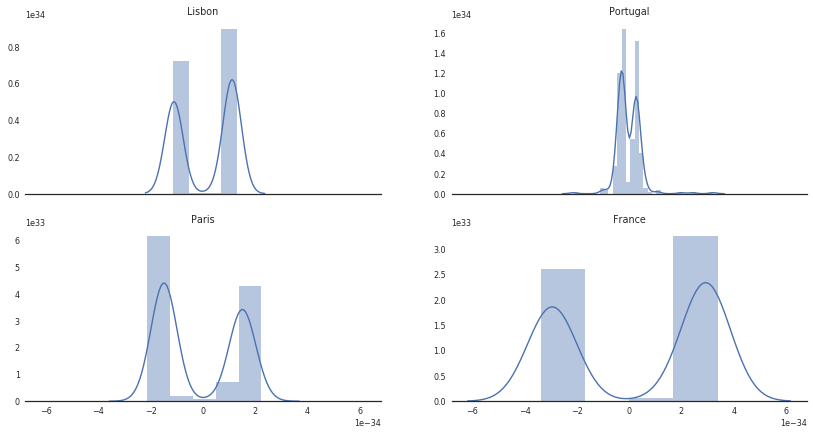

In [14]:
lx_vector = get_vector("lisbon")
pt_vector = get_vector("portugal")

paris_vector = get_vector("paris")
fr_vector = get_vector("france")

# setup figure
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=True)
sns.despine(left=True)
sns.set(style="white", context="paper")

sns.distplot(lx_vector,ax=axes[0,0])
axes[0,0].set_title("Lisbon")
sns.distplot(pt_vector,ax=axes[0,1])
axes[0,1].set_title("Portugal")
sns.distplot(fr_vector,ax=axes[1,0])
axes[1,0].set_title("Paris")
sns.distplot(paris_vector,ax=axes[1,1])
axes[1,1].set_title("France")

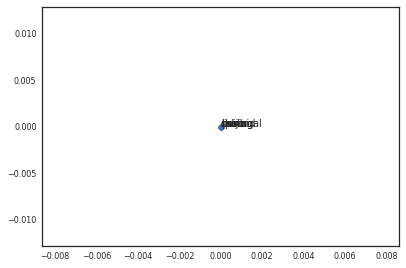

In [6]:
# this is bad depends on the corpus and model
words = [
    "china",
    "beijing",
    "portugal",
    "lisbon",
    "madrid",
    "spain"
]

vectors = np.array([get_vector(w) for w in words])

pca = PCA(n_components=2)
projection = pca.fit(vectors).transform(vectors)


sns.set(style="white", context="paper")
fig, ax = plt.subplots()
plt.scatter(projection[:,0],projection[:,1])

for i,text in enumerate(words):
    ax.annotate(text,(projection[i,0],projection[i,1]))

question  1
word: enormously
correct:  tremendously
model answer:  tremendously
question  2
word: provisions
correct:  stipulations
model answer:  interrelations
question  3
word: haphazardly
correct:  randomly
model answer:  randomly
question  4
word: prominent
correct:  conspicuous
model answer:  conspicuous
question  5
word: zenith
correct:  pinnacle
model answer:  completion
question  6
word: flawed
correct:  imperfect
model answer:  lustrous
question  7
word: urgently
correct:  desperately
model answer:  conceivably
question  8
word: consumed
correct:  eaten
model answer:  bred
question  9
word: advent
correct:  coming
model answer:  stability
question  10
word: concisely
correct:  succinctly
model answer:  succinctly
question  11
word: salutes
correct:  greetings
model answer:  ceremonies
question  12
word: solitary
correct:  alone
model answer:  alone
question  13
word: hasten
correct:  accelerate
model answer:  accompany
question  14
word: perseverance
correct:  endurance
model

word: hastily
correct:  hurriedly
model answer:  hurriedly
question  42
word: temperate
correct:  mild
model answer:  windy
question  43
word: grin
correct:  smile
model answer:  exercise
question  44
word: verbally
correct:  orally
model answer:  verbosely
question  45
word: physician
correct:  doctor
model answer:  pharmacist
question  46
word: essentially
correct:  basically
model answer:  basically
question  47
word: keen
correct:  sharp
model answer:  famous
question  48
word: situated
correct:  positioned
model answer:  emptying
question  49
word: principal
correct:  major
model answer:  most
question  50
word: slowly
correct:  gradually
model answer:  gradually
question  51
word: built
correct:  constructed
model answer:  proposed
question  52
word: tasks
correct:  jobs
model answer:  materials
question  53
word: unlikely
correct:  improbable
model answer:  disagreeable
question  55
word: annals
correct:  chronicles
model answer:  trails
question  56
word: wildly
correct:  furio

word: uniform
correct:  alike
model answer:  sharp
question  74
word: figure
correct:  solve
model answer:  list
question  75
word: sufficient
correct:  enough
model answer:  physiological
question  76
word: fashion
correct:  manner
model answer:  manner
question  77
word: marketed
correct:  sold
model answer:  sold
question  78
word: bigger
correct:  larger
model answer:  larger
question  79
word: roots
correct:  origins
model answer:  rituals
question  80
word: normally
correct:  ordinarily
model answer:  permanently
